# Movie Analysis

### Importing modules

In [54]:
# importing modules
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Saving Datasets to user computer and loading it dynamically

In [55]:
path_1 = kagglehub.dataset_download("rajugc/imdb-movies-dataset-based-on-genre")
path_2 = kagglehub.dataset_download("ruchi798/movies-on-netflix-prime-video-hulu-and-disney")
scifi_dataset = pd.read_csv(f"{path_1}/scifi.csv")
stream_dataset = pd.read_csv(f"{path_2}/MoviesOnStreamingPlatforms.csv")


In [56]:
scifi_dataset.columns

Index(['movie_id', 'movie_name', 'year', 'certificate', 'runtime', 'genre',
       'rating', 'description', 'director', 'director_id', 'star', 'star_id',
       'votes', 'gross(in $)'],
      dtype='object')

In [57]:
# original columns     ['movie_id', 'movie_name', 'year', 'certificate', 'runtime', 'genre',
#           'rating', 'description', 'director', 'director_id', 'star', 'star_id',
#           'votes', 'gross(in $)'] 
scifi_dataset = scifi_dataset.drop(
    ['movie_id','year', 'certificate', 'runtime', 'genre', 'director_id', 'star_id','votes'], axis='columns'
)



scifi_dataset['rating'] = scifi_dataset['rating'].apply(
    lambda x: str(float(x) * 10))
scifi_dataset['gross(in $)'] = scifi_dataset['gross(in $)'] / 1_000_000

scifi_dataset['rating'] = scifi_dataset['rating'].astype(float)
scifi_dataset.columns = (
    scifi_dataset.columns
    .str.upper()
    .str.strip()
    .str.replace('_',' ')
)
scifi_dataset.columns

Index(['MOVIE NAME', 'RATING', 'DESCRIPTION', 'DIRECTOR', 'STAR',
       'GROSS(IN $)'],
      dtype='object')

In [58]:
stream_dataset.columns = (
    stream_dataset.columns
    .str.upper()
    .str.strip()
    .str.replace('_',' ')
)
stream_dataset['ROTTEN TOMATOES'] = stream_dataset['ROTTEN TOMATOES'].astype(str)

stream_dataset['ROTTEN TOMATOES'] = stream_dataset['ROTTEN TOMATOES'].apply(
    lambda x: (float(x.split('/')[0]) / float(x.split('/')[1]) * 100) if '/' in x else None)
stream_dataset = stream_dataset.drop(
    ['UNNAMED: 0', 'ID', 'YEAR', 'AGE', 'TYPE'], axis ='columns')

stream_dataset[['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']] = stream_dataset[['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']].astype(bool)
stream_dataset = stream_dataset.rename(columns={'TITLE': 'MOVIE NAME'})
stream_dataset = stream_dataset.dropna()
#stream_cleaned.info()
stream_dataset.columns = stream_dataset.columns.str.strip().str.upper()

In [59]:
stream_dataset.columns

Index(['MOVIE NAME', 'ROTTEN TOMATOES', 'NETFLIX', 'HULU', 'PRIME VIDEO',
       'DISNEY+'],
      dtype='object')

In [60]:
scifi_dataset.head(5)

,MOVIE NAME,RATING,DESCRIPTION,DIRECTOR,STAR,GROSS(IN $)
0,Black Panther: Wakanda Forever,69.0,The people of Wakanda fight to protect their h...,Ryan Coogler,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...",NaN
1,Avatar: The Way of Water,78.0,Jake Sully lives with his newfound family form...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We...",NaN
2,Everything Everywhere All at Once,80.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert","Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...",NaN
3,M3GAN,64.0,A robotics engineer at a toy company builds a ...,Gerard Johnstone,"Allison Williams, \nViolet McGraw, \nRonny Chi...",NaN
4,Ant-Man and the Wasp: Quantumania,66.0,"Scott Lang and Hope Van Dyne, along with Hank ...",Peyton Reed,"Paul Rudd, \nEvangeline Lilly, \nJonathan Majo...",NaN


In [61]:
stream_dataset.head(5)

,MOVIE NAME,ROTTEN TOMATOES,NETFLIX,HULU,PRIME VIDEO,DISNEY+
0,The Irishman,98.0,True,False,False,False
1,Dangal,97.0,True,False,False,False
2,David Attenborough: A Life on Our Planet,95.0,True,False,False,False
3,Lagaan: Once Upon a Time in India,94.0,True,False,False,False
4,Roma,94.0,True,False,False,False


In [62]:
merged_data = pd.merge(scifi_dataset, stream_dataset, on='MOVIE NAME', how='inner')

In [63]:
merged_data.head(5)

,MOVIE NAME,RATING,DESCRIPTION,DIRECTOR,STAR,GROSS(IN $),ROTTEN TOMATOES,NETFLIX,HULU,PRIME VIDEO,DISNEY+
0,Black Panther,73.0,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...",700.059566,84.0,False,False,False,True
1,Avatar,79.0,A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We...",760.507625,86.0,False,False,False,True
2,Avengers: Endgame,84.0,After the devastating events of Avengers: Infi...,"Anthony Russo, \nJoe Russo","Robert Downey Jr., \nChris Evans, \nMark Ruffa...",858.373000,90.0,False,False,False,True
3,Ant-Man,73.0,Armed with a super-suit with the astonishing a...,Peyton Reed,"Paul Rudd, \nMichael Douglas, \nCorey Stoll, \...",180.202163,84.0,False,False,False,True
4,About Time,78.0,"At the age of 21, Tim discovers he can travel ...",Richard Curtis,"Domhnall Gleeson, \nRachel McAdams, \nBill Nig...",15.322921,83.0,True,False,False,False


In [64]:
merged_data.isna().sum()


MOVIE NAME           0
RATING             167
DESCRIPTION          0
DIRECTOR            57
STAR               104
GROSS(IN $)        583
ROTTEN TOMATOES      0
NETFLIX              0
HULU                 0
PRIME VIDEO          0
DISNEY+              0
dtype: int64

In [65]:
merged_data.head(10)

,MOVIE NAME,RATING,DESCRIPTION,DIRECTOR,STAR,GROSS(IN $),ROTTEN TOMATOES,NETFLIX,HULU,PRIME VIDEO,DISNEY+
0,Black Panther,73.0,"T'Challa, heir to the hidden but advanced king...",Ryan Coogler,"Chadwick Boseman, \nMichael B. Jordan, \nLupit...",700.059566,84.0,False,False,False,True
1,Avatar,79.0,A paraplegic Marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, \nZoe Saldana, \nSigourney We...",760.507625,86.0,False,False,False,True
2,Avengers: Endgame,84.0,After the devastating events of Avengers: Infi...,"Anthony Russo, \nJoe Russo","Robert Downey Jr., \nChris Evans, \nMark Ruffa...",858.373000,90.0,False,False,False,True
3,Ant-Man,73.0,Armed with a super-suit with the astonishing a...,Peyton Reed,"Paul Rudd, \nMichael Douglas, \nCorey Stoll, \...",180.202163,84.0,False,False,False,True
4,About Time,78.0,"At the age of 21, Tim discovers he can travel ...",Richard Curtis,"Domhnall Gleeson, \nRachel McAdams, \nBill Nig...",15.322921,83.0,True,False,False,False
5,Guardians of the Galaxy,80.0,A group of intergalactic criminals must pull t...,James Gunn,"Chris Pratt, \nVin Diesel, \nBradley Cooper, \...",333.176600,89.0,False,False,False,True
6,Alien,85.0,The crew of a commercial spacecraft encounter ...,Ridley Scott,"Sigourney Weaver, \nTom Skerritt, \nJohn Hurt,...",78.900000,88.0,False,False,True,False
7,Avengers: Infinity War,84.0,The Avengers and their allies must be willing ...,"Anthony Russo, \nJoe Russo","Robert Downey Jr., \nChris Hemsworth, \nMark R...",678.815482,90.0,False,False,False,True
8,A Clockwork Orange,83.0,"In the future, a sadistic gang leader is impri...",Stanley Kubrick,"Malcolm McDowell, \nPatrick Magee, \nMichael B...",6.207725,86.0,True,False,False,False
9,Ant-Man and the Wasp,70.0,As Scott Lang balances being both a superhero ...,Peyton Reed,"Paul Rudd, \nEvangeline Lilly, \nMichael Peña,...",216.648740,81.0,False,False,False,True


In [66]:
cleaned_data = merged_data.dropna()

In [67]:
cleaned_data.isnull().sum()

MOVIE NAME         0
RATING             0
DESCRIPTION        0
DIRECTOR           0
STAR               0
GROSS(IN $)        0
ROTTEN TOMATOES    0
NETFLIX            0
HULU               0
PRIME VIDEO        0
DISNEY+            0
dtype: int64

In [68]:
cleaned_data.isnull().sum()

MOVIE NAME         0
RATING             0
DESCRIPTION        0
DIRECTOR           0
STAR               0
GROSS(IN $)        0
ROTTEN TOMATOES    0
NETFLIX            0
HULU               0
PRIME VIDEO        0
DISNEY+            0
dtype: int64

In [69]:
#cleaned_data['RATING'] = cleaned_data['RATING'].astype('float64')
print(cleaned_data.dtypes)

MOVIE NAME          object
RATING             float64
DESCRIPTION         object
DIRECTOR            object
STAR                object
GROSS(IN $)        float64
ROTTEN TOMATOES    float64
NETFLIX               bool
HULU                  bool
PRIME VIDEO           bool
DISNEY+               bool
dtype: object


In [70]:
# Feature Engineering
cleaned_data.loc[:,'AVERAGE RATING'] = (cleaned_data['RATING'] + cleaned_data['ROTTEN TOMATOES']) / 2
cleaned_data.count()

C:\Users\drvan\AppData\Local\Temp\ipykernel_13084\421606624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:,'AVERAGE RATING'] = (cleaned_data['RATING'] + cleaned_data['ROTTEN TOMATOES']) / 2


MOVIE NAME         246
RATING             246
DESCRIPTION        246
DIRECTOR           246
STAR               246
GROSS(IN $)        246
ROTTEN TOMATOES    246
NETFLIX            246
HULU               246
PRIME VIDEO        246
DISNEY+            246
AVERAGE RATING     246
dtype: int64

In [71]:
# Statistical Analysis
print(cleaned_data.describe())

           RATING  GROSS(IN $)  ROTTEN TOMATOES  AVERAGE RATING
count  246.000000   246.000000       246.000000       246.00000
mean    63.512195    80.185947        70.052846        66.78252
std     10.740247   136.713777        10.736988         9.73236
min     24.000000     0.004288        34.000000        32.00000
25%     57.000000     3.683763        64.000000        61.00000
50%     64.000000    29.172514        71.500000        67.00000
75%     71.000000    83.876801        78.000000        73.50000
max     86.000000   858.373000        90.000000        87.50000


In [74]:
print(cleaned_data['DIRECTOR'].value_counts())


DIRECTOR
James Cameron                                                 4
Anthony Russo, \nJoe Russo                                    4
Paul W.S. Anderson                                            4
Paul Verhoeven                                                3
George Lucas                                                  3
                                                             ..
Nicholas Gyeney                                               1
Akiyuki Shinbô, \nNobuyuki Takeuchi                           1
John Mitchell, \nJeremy Kipp Walker                           1
Shirish Kunder                                                1
William Beaudine, \nNorman Foster, \nE. Darrell Hallenbeck    1
Name: count, Length: 207, dtype: int64


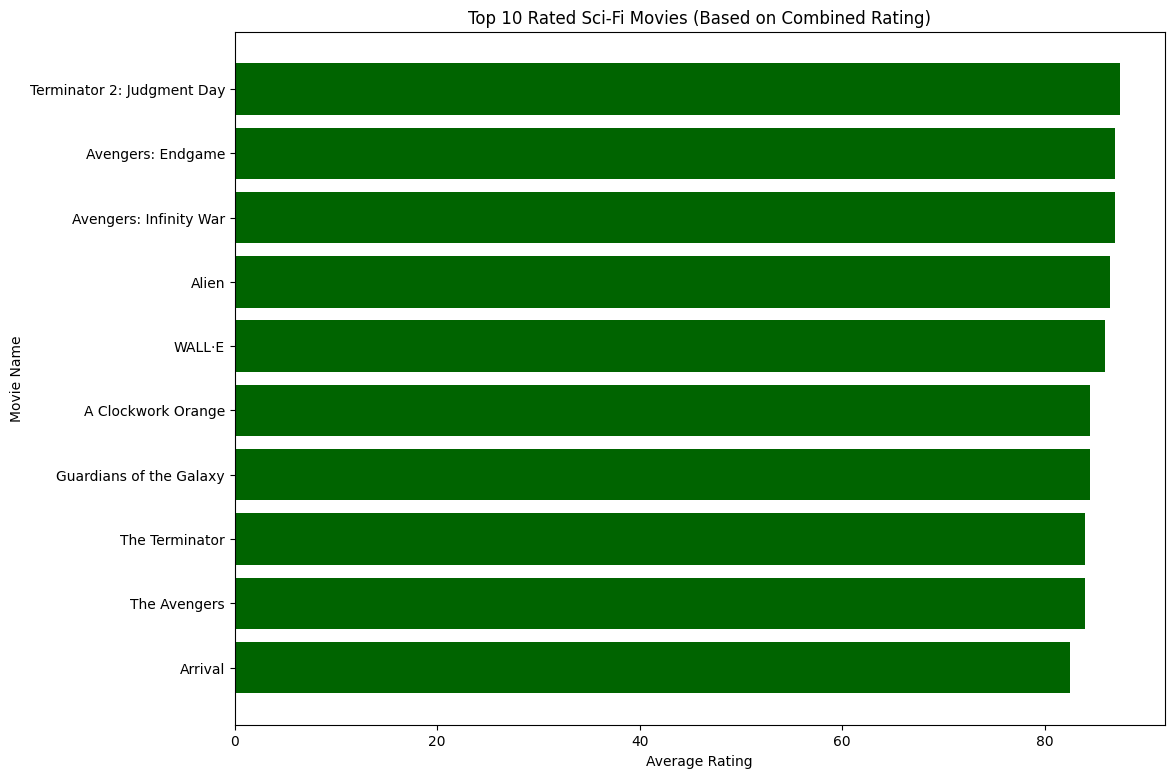

In [91]:
# TOP 10 movies
cleaned_data_sorted = cleaned_data.sort_values(by='AVERAGE RATING', ascending=False)
top_10_df = cleaned_data_sorted.head(10)
bottom_10_df = cleaned_data_sorted.tail(10)

plt.figure(figsize=(12, 9))
plt.barh(top_10_df['MOVIE NAME'], top_10_df['AVERAGE RATING'], color='darkgreen')
plt.xlabel('Average Rating')
plt.ylabel('Movie Name')
plt.title('Top 10 Rated Sci-Fi Movies (Based on Combined Rating)')
plt.gca().invert_yaxis()
plt.show()

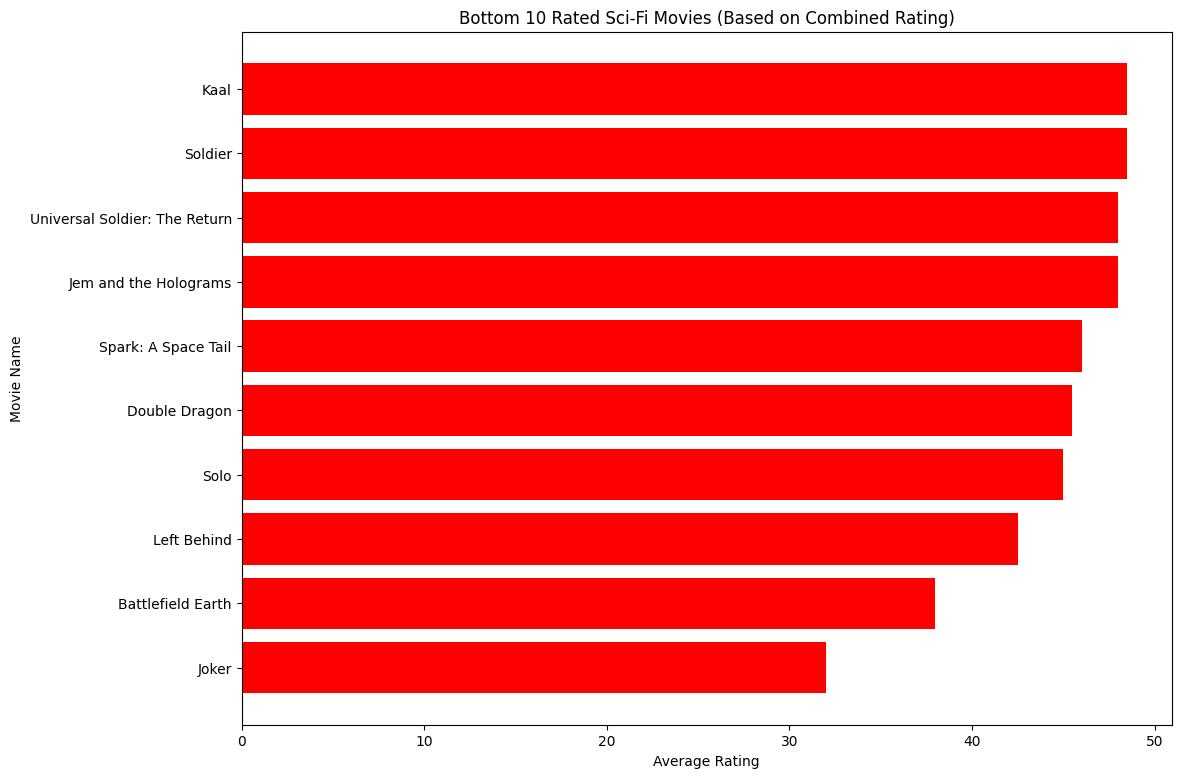

In [88]:
# Plotting the bar plot
plt.figure(figsize=(12, 9))
plt.barh(bottom_10_df['MOVIE NAME'], bottom_10_df['AVERAGE RATING'], color='red')
plt.xlabel('Average Rating')
plt.ylabel('Movie Name')
plt.title('Bottom 10 Rated Sci-Fi Movies (Based on Combined Rating)')
plt.gca().invert_yaxis()
plt.show()

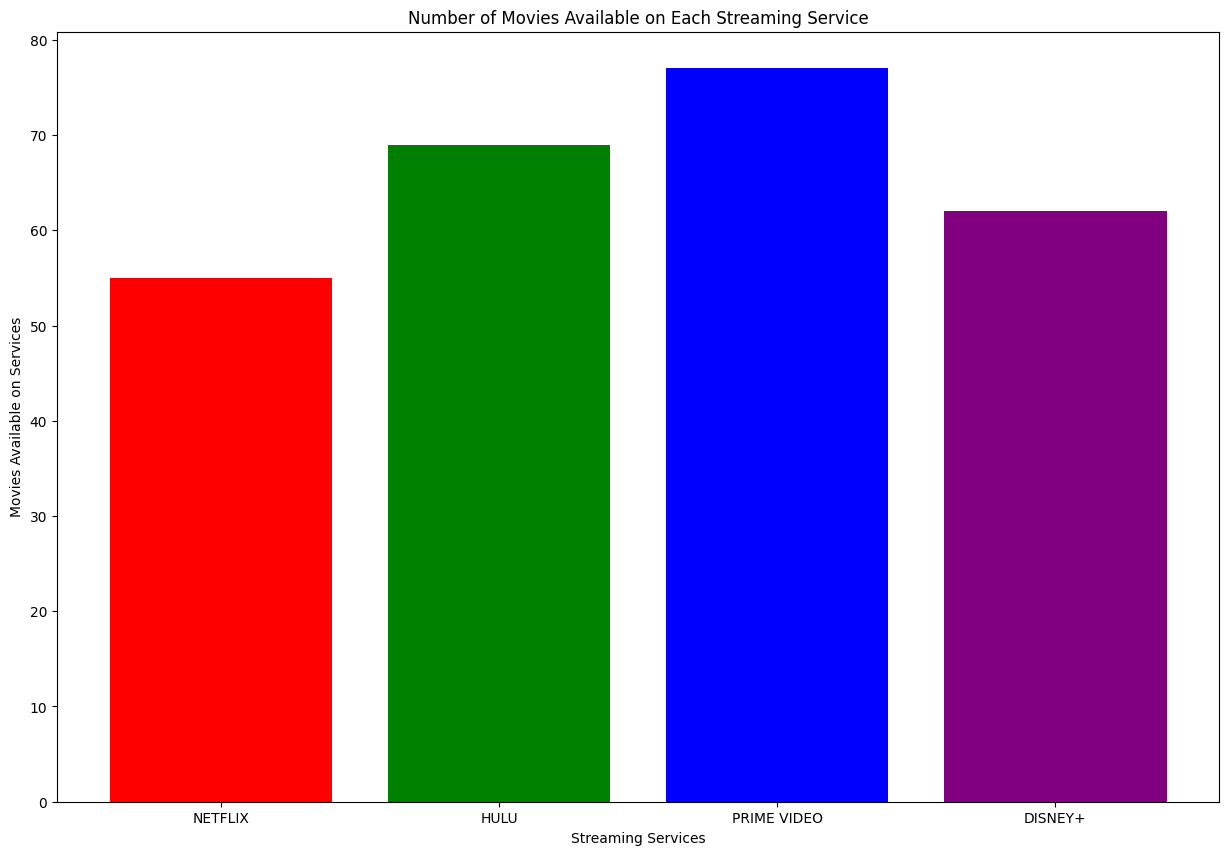

In [80]:
# Count the number of movies available on each streaming service
services = ['NETFLIX', 'HULU', 'PRIME VIDEO', 'DISNEY+']
counts = {service: cleaned_data[service].sum() for service in services}

# Create a DataFrame for plotting
counts_df = pd.DataFrame(list(counts.items()), columns=['Streaming Service', 'Movies Available'])

# Plotting the bar plot
plt.figure(figsize=(15, 10))
plt.bar(counts_df['Streaming Service'], counts_df['Movies Available'], color=['red', 'green', 'blue', 'purple'])
plt.xlabel('Streaming Services')
plt.ylabel('Movies Available on Services')
plt.title('Number of Movies Available on Each Streaming Service')
plt.show()

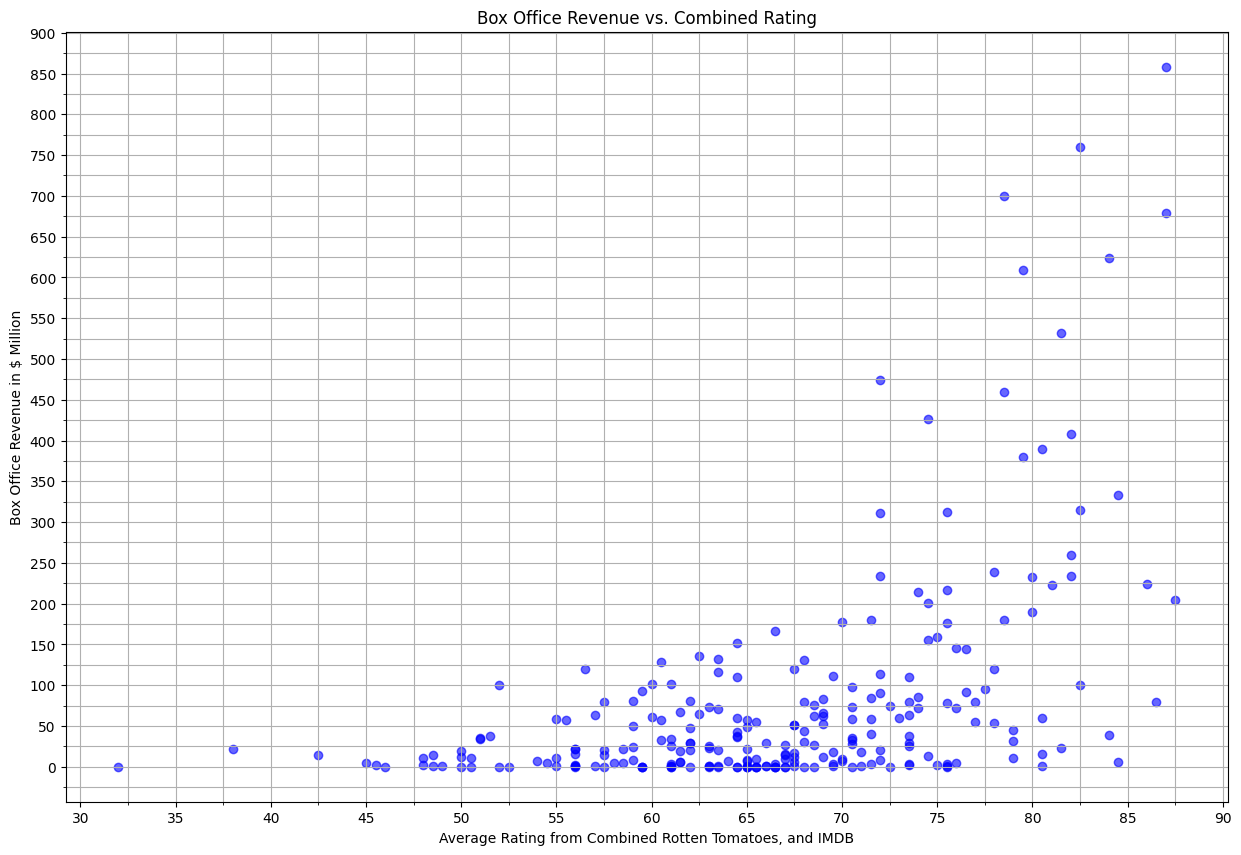

In [79]:
# Box Office Scatter Chart
plt.figure(figsize=(15, 10))
plt.scatter(cleaned_data['AVERAGE RATING'], cleaned_data['GROSS(IN $)'], color='blue', alpha=0.6)
plt.xlabel('Average Rating from Combined Rotten Tomatoes, and IMDB')
plt.ylabel('Box Office Revenue in $ Million')
plt.title('Box Office Revenue vs. Combined Rating')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(25))

plt.grid(True, which='both')
plt.show()